## Clustering shopping mall customers Using KMeans (Unsupervised Learning)

This notebook will introduce some basic unsupervised learning in machine learning by clustering mall customers using Kmeans Algorithms

## Kmeans Algorithm

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

  ## Problem Definition
  
  the aim of this project is to group customers into clusters based on their expenditure, we will use the Kmeans algorithm since the data has no labels
  
  ## Data 
  
  data used is  from kaggle  https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
  
  # features
  
      1. CustomerID - uniques ID assigned to customer
      2. Gender     - Gender of the customer
      3. Age    - age of the customer
      4. Annual income  - anuual earnings/income of the customer
      5. Spending Score  - score assigned by the mall based on customer behavior and spending nature
  
  
 

In [1]:
## importing Regular EDA and plotting libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # pandas and matplotlib for data visualization
import seaborn as sns
%matplotlib inline


## importing sklearn models

from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv("data\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
## Checking for null Values

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## EDA

In [11]:
df.rename(columns={"Spending Score (1-100)":"spending_score","Annual Income (k$)":"annual_income"})

,CustomerID,Gender,Age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


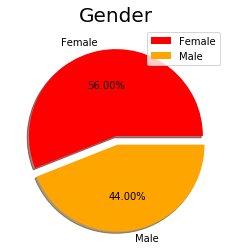

In [12]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['red', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (4, 4)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Text(0, 0.5, 'Age')

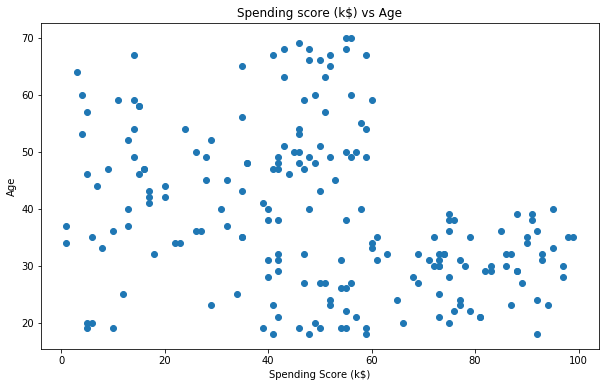

In [13]:
## Plotting Age against Spending score

plt.figure(figsize=(10,6))
plt.scatter(df['Spending Score (1-100)'],df['Age'])
plt.title('Spending score (k$) vs Age')
plt.xlabel('Spending Score (k$)')
plt.ylabel('Age')

In [17]:
for col_name in df:
    print(col_name)

CustomerID
Gender
Age
Annual Income (k$)
Spending Score (1-100)


Text(0, 0.5, 'Spending Score (1-100)')

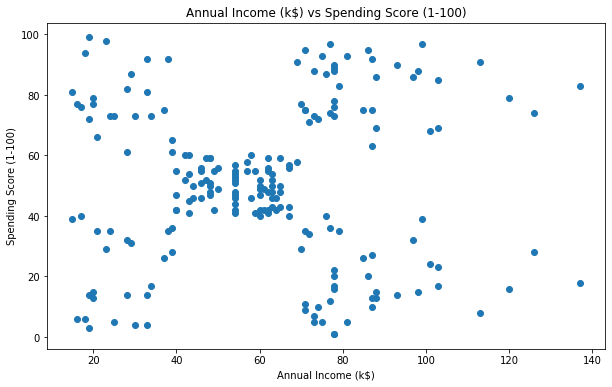

In [15]:
## Plotting Annual income  against Spending score

plt.figure(figsize=(10,6))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

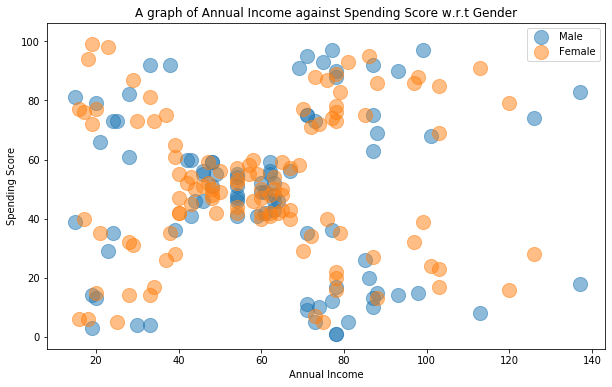

In [16]:
## Plotting annual income against spending score wrt gender

plt.figure(1, figsize=(10,6))

for gender in ['Male','Female']:
    plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=df[df['Gender']==gender],s = 200,alpha=0.5, label=gender)
    
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('A graph of Annual Income against Spending Score w.r.t Gender')
plt.legend()
plt.show()
    

from the plots above, one can deduxe that there are some concerns here for the management of the mall as there are people with large annual income but their spending score is minimal

In [21]:
for columns in df:
    print(columns)

CustomerID
Gender
Age
Annual Income (k$)
Spending Score (1-100)


In [26]:
## Dropping Duplicate Values

df.drop_duplicates(inplace=True)

In [29]:
## we will use only the spending score and income level as our features to determine the labels
X = df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

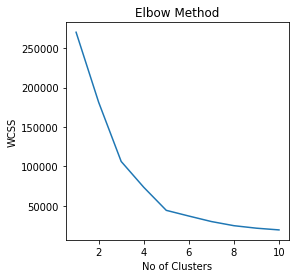

In [37]:
## plot the elbow method to find the number of clusters we will use
## wcss --within cluster sum of squares

wcss = []

for i in range(1,11):
    Kmeans = KMeans(n_clusters=i,init='k-means++',n_init=10,
    max_iter=300,random_state=0)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()
    

from the elbow method above, we can conclude that the number of clusters to be used is 5

In [40]:
Kmeans = KMeans(n_clusters = 5,init='k-means++',n_init = 10,max_iter=300,random_state=0)

y_preds = Kmeans.fit_predict(X)

y_preds

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

Now let's visualize the clusters

C:\Users\abda5\Contacts\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abda5\Contacts\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abda5\Contacts\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

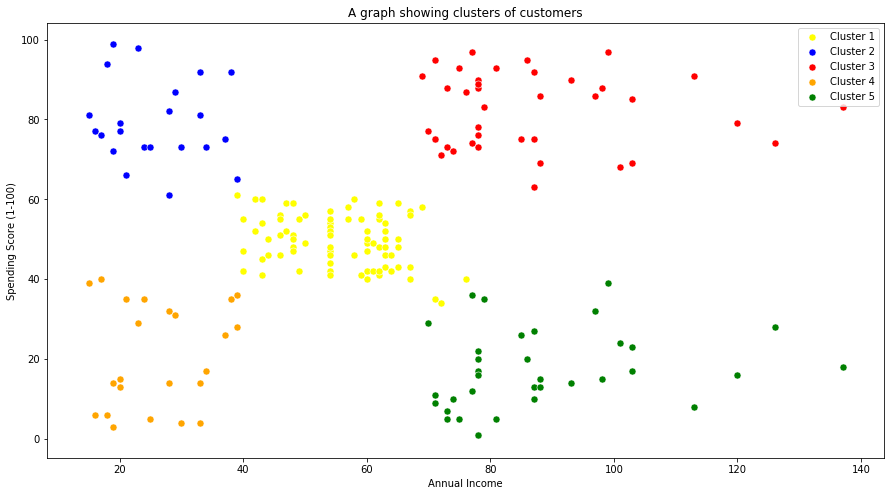

In [46]:
plt.figure(figsize=(15,8))


sns.scatterplot(X[y_preds == 0, 0], X[y_preds == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_preds==1,0], X[y_preds==1,1], color = 'blue', label='Cluster 2',s=50)
sns.scatterplot(X[y_preds == 2,0], X[y_preds==2,1], color = 'red', label = 'Cluster 3', s=50)
sns.scatterplot(X[y_preds == 3,0], X[y_preds==3,1], color = 'orange', label = 'Cluster 4', s=50)
sns.scatterplot(X[y_preds==4,0],X[y_preds==4,1], color = 'Green',label='Cluster 5',s=50)

plt.grid(False)
plt.title('A graph showing clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

from the graph above, we can see clearly the clusters of customers based on their spending score and annual income, the mall should look into those in cluster 5 as their spending score is low while their earnings are above average, 